# ktk.pushrimkinetics Tutorial
The pushrimkinetics module allows processing kinetics data from instrumented wheelchair wheels such as the SmartWheel.

In [1]:
import ktk
import matplotlib.pyplot as plt

## Load data from a SmartWheel's CSV file
The first step is to load data from a file. This is done using the ``read_file`` function:

In [2]:
help(ktk.pushrimkinetics.read_file)

Help on function read_file in module ktk.pushrimkinetics:

read_file(filename)



In [3]:
filename = 'data/pushrimkinetics/sample_swl_overground_propulsion_withrubber.csv'
kinetics = ktk.pushrimkinetics.read_file(filename)

Let's look what we just loaded.

In [4]:
kinetics

TimeSeries with attributes:
           time: <array of shape (7682,)>,
      time_info: <dict with 1 entries>,
           data: <dict with 5 entries>,
      data_info: <dict with 4 entries>,
         events: <list of 0 items>

In [5]:
kinetics.data

{
       'Index': <array of shape (7682,)>,
    'Channels': <array of shape (7682, 6)>,
      'Forces': <array of shape (7682, 4)>,
     'Moments': <array of shape (7682, 4)>,
       'Angle': <array of shape (7682,)>
}

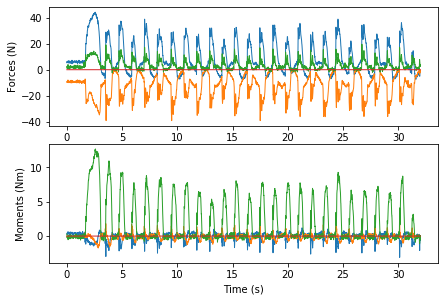

In [6]:
kinetics.plot(['Forces', 'Moments'])

# Removing sinusoids in forces and moments
We observe in the last graphs that sinusoidal offsets are presents mostly in the forces but also in the moments. We can auto-remove these offsets using ``remove_sinusoids``.

In [7]:
help(ktk.pushrimkinetics.remove_sinusoids)

Help on function remove_sinusoids in module ktk.pushrimkinetics:

remove_sinusoids(kinetics, baseline_kinetics=None)
    Remove sinusoids in forces and moments.
    
    Reference: F. Chénier, R. Aissaoui, C. Gauthier, and D. H. Gagnon,
    "Wheelchair pushrim kinetics measurement: A method to cancel
    inaccuracies due to pushrim weight and wheel camber," Medical
    Engineering and Physics, vol. 40, pp. 75--86, 2017.
    
    Parameters
    ----------
    kinetics : TimeSeries
        TimeSeries that contains at least Forces, Moments and Angle data.
    baseline_kinetics : TimeSeries, optional
        TimeSeries that contains at least Forces and Moments data. This
        TimeSeries contains a baseline trial, where the wheelchair must be
        pushed by an operator and where no external force must be applied on
        the pushrims. If no baseline is provided, the baseline is calculated
        based on a detection of recoveries in the supplied kinetics
        TimeSeries.
    
  

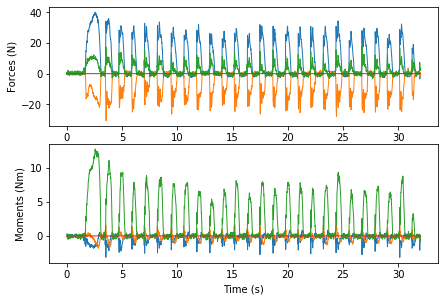

In [8]:
new_kinetics = ktk.pushrimkinetics.remove_sinusoids(kinetics)
new_kinetics.plot(['Forces', 'Moments'])

The automatic method has only be validated for straight-line, level-ground propulsion. For any other condition, a baseline trial is required. A baseline trial is a trial where an operator pushes the wheelchair but no external force appart from gravity is applied on the instrumented wheel. 

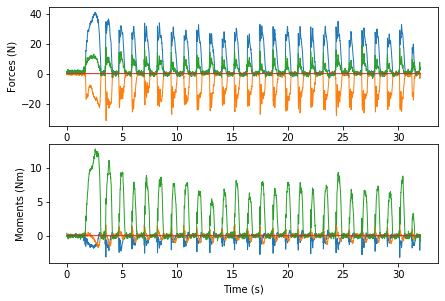

In [9]:
baseline = ktk.pushrimkinetics.read_file('data/pushrimkinetics/sample_swl_overground_baseline_withrubber.csv')
new_kinetics = ktk.pushrimkinetics.remove_sinusoids(kinetics, baseline)
new_kinetics.plot(['Forces', 'Moments'])

# Detect pushes
The function ``detect_pushes`` allows detecting pushes and recoveries automatically based on a double-threshold.

In [10]:
help(ktk.pushrimkinetics.detect_pushes)

Help on function detect_pushes in module ktk.pushrimkinetics:

detect_pushes(tsin, push_trigger=5, recovery_trigger=2, minimum_push_time=0.1, minimum_recovery_time=0.2)
    Detect pushes and recoveries automatically.
    
    
    Parameters
    ----------
    tsin : TimeSeries
        Input TimeSeries that must contain a 'Forces' key in its data dict.
    push_trigger : float, optional
        The total force over which a push phase is triggered, in newton.
        The default is 5.
    recovery_trigger : float, optional
        The total force under which a recovery phase is triggered, in newton.
    minimum_push_time : float, optional
        The minimum time required for a push time, in seconds. Detected pushes
        that last less than this minimum time are removed from the push
        analysis. The default is 0.1.
    minimum_recovery_time : float, optional
        The minimum time required for a recovery time, in seconds. Detected
        recoveies that last less than this mi

In [11]:
kinetics_with_pushes = ktk.pushrimkinetics.detect_pushes(new_kinetics)
kinetics_with_pushes

TimeSeries with attributes:
           time: <array of shape (7682,)>,
      time_info: <dict with 1 entries>,
           data: <dict with 5 entries>,
      data_info: <dict with 4 entries>,
         events: <list of 77 items>

We see that the TimeSeries now has 77 items. Let see these events on a graph.

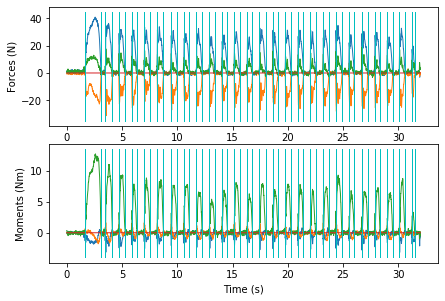

In [12]:
kinetics_with_pushes.plot(['Forces','Moments'])